<a href="https://colab.research.google.com/github/khoabom02/AI_Basic/blob/main/Midterm_Report/Facial_Expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
## Data using for trainning
folder_train = '/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Data_Train/'
photos_train, labels_train = list(), list()
for file in listdir(folder_train) :
  output = 0.0
  if file.startswith('Happy'):
    output=1.0
  if file.startswith('Sad'):
    output=2.0
  if file.startswith('Anger'):
    output=3.0
  if file.startswith('Surprise'):
    output=4.0
  photo = load_img(folder_train + file, target_size = (150,150))
  photo = img_to_array(photo)
  photos_train.append(photo)
  labels_train.append(output)
photos_train = asarray(photos_train)
labels_train = asarray(labels_train)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Train/Face_train_photos.npy',photos_train)
save('/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Train/Face_train_labels.npy',labels_train)

(1645, 150, 150, 3) (1645,)


In [ ]:
## Data using for testing
folder_test = '/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Data_Train/'
photos_test, labels_test = list(), list()
for file in listdir(folder_test) :
  output = 0.0
  if file.startswith('Happy'):
    output=1.0
  if file.startswith('Sad'):
    output=2.0
  if file.startswith('Anger'):
    output=3.0
  if file.startswith('Surprise'):
    output=4.0
  photo_t = load_img(folder_test + file, target_size = (150,150))
  photo_t = img_to_array(photo_t)
  photos_test.append(photo_t)
  labels_test.append(output)
photos_test = asarray(photos_test)
labels_test = asarray(labels_test)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Test/Face_test_photos.npy',photos_test)
save('/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Test/Face_test_labels.npy',labels_test)

(1645, 150, 150, 3) (1645,)


In [ ]:
## Convert to Gray Image
photos_train = photos_train.astype('float')/255.0
photos_test = photos_test.astype('float')/255.0

In [ ]:
## One hot encoding
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
print(labels_train.shape)
print(labels_test.shape)

In [ ]:
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Normalization, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
#-------------------------------------#
batch_size = 64
epochs = 50
classes = 5

In [ ]:
# Split data into train and test sets
split_index = int(0.1 * len(photos_train))
test_x, test_y = photos_train[:split_index], labels_train[:split_index]
train_x, train_y = photos_train[split_index:], labels_train[split_index:]

In [ ]:
## Create CNN model
model=Sequential()
## Convolution
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(150,150,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#----------------------------------------------#
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#----------------------------------------------#
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

In [ ]:
## Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation= 'softmax'))

In [ ]:
## Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [ ]:
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

In [ ]:
## Train model
train = model.fit(photos_train, labels_train, batch_size, epochs=epochs, verbose=1,validation_data=(test_x, test_y))
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)
print('Loss:', test_loss)

Epoch 1/50
26/26 [==============================] - 13s 121ms/step - loss: 1.7596 - accuracy: 0.3331 - val_loss: 1.2828 - val_accuracy: 0.2500
Epoch 2/50
26/26 [==============================] - 2s 70ms/step - loss: 1.3245 - accuracy: 0.3702 - val_loss: 1.1900 - val_accuracy: 0.3598
Epoch 3/50
26/26 [==============================] - 2s 74ms/step - loss: 1.1880 - accuracy: 0.4906 - val_loss: 0.9592 - val_accuracy: 0.6768
Epoch 4/50
26/26 [==============================] - 2s 75ms/step - loss: 1.0340 - accuracy: 0.5884 - val_loss: 1.0052 - val_accuracy: 0.5793
Epoch 5/50
26/26 [==============================] - 2s 71ms/step - loss: 0.8885 - accuracy: 0.6571 - val_loss: 0.6628 - val_accuracy: 0.7927
Epoch 6/50
26/26 [==============================] - 2s 70ms/step - loss: 0.7672 - accuracy: 0.7046 - val_loss: 0.5085 - val_accuracy: 0.8720
Epoch 7/50
26/26 [==============================] - 2s 70ms/step - loss: 0.5956 - accuracy: 0.7787 - val_loss: 0.4714 - val_accuracy: 0.8354
Epoch 8/50


In [ ]:
## Save Model
model.save('/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/model_face.h5')

<ipython-input-16-d164d1ce7a5b>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='red')


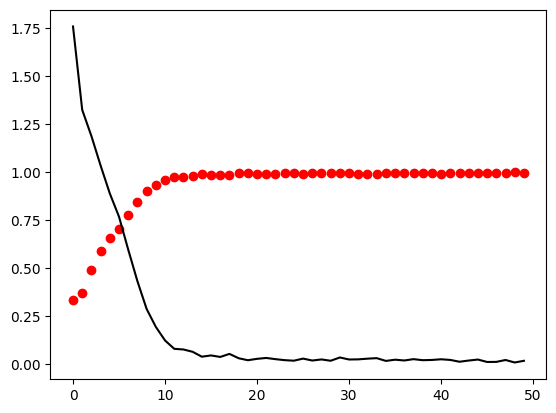

In [ ]:
## Evaluate the accuracy
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
## Graphing
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='red')
plt.plot(epochs,loss , 'k', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 231ms/step
Anger


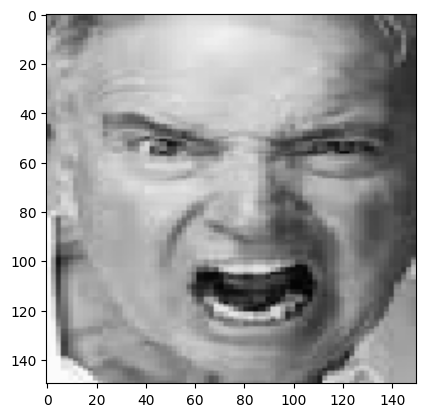

1/1 [==============================] - 0s 18ms/step
Happy


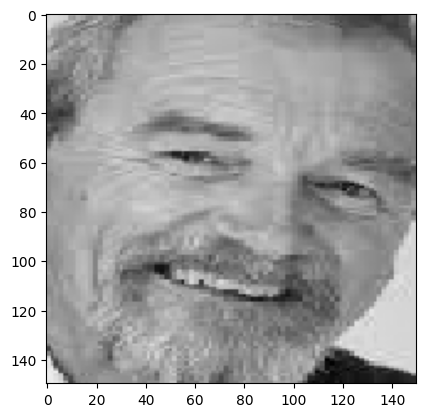

1/1 [==============================] - 0s 23ms/step
Sad


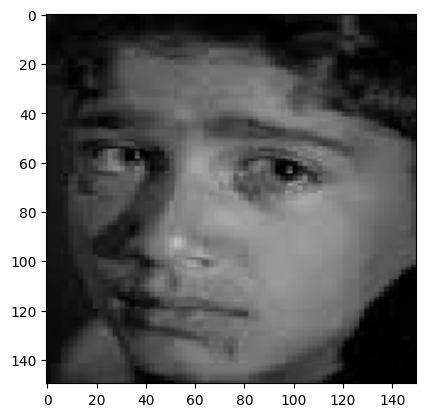

1/1 [==============================] - 0s 18ms/step
Surprise


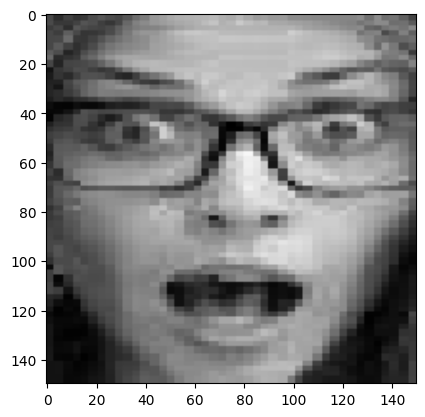

In [ ]:
from os import listdir
import numpy as np
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Data_train_AI/data_train/Fingerprint/Data_test'
for file in listdir(folder):
  photos = load_img(folder + '/' +  file, target_size = (150, 150))
  plt.imshow(photos)
  photo = load_img(folder + '/' +  file, target_size = (150, 150))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['Happy', 'Sad','Anger', 'Surprise']
  print(class_name[result - 1])
  plt.show()